In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Change style for sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'../DataSet/Telco-Customer-Churn-preprocessed.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
df['Churn'].value_counts(normalize=True)


## inbalance Churn so when we build our model we need to balance it using something like SMOTE 

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

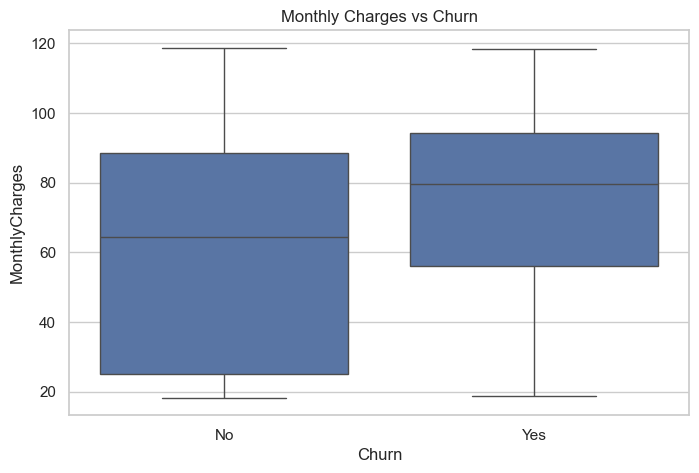

In [21]:
##Visual Analysis column [ ' tenure', ' MonthlyCharges', ' TotalCharges'] with churn to check when customer leave is he paying high or not

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

# Explanation below the boxplot

### Monthly Charges vs Churn – Key Insights

- Customers who **churn tend to have higher monthly charges** compared to those who stay.
- This suggests that **pricing sensitivity** may be a key factor in customer retention.
- Customers with **high monthly bills are more likely to leave**, possibly due to perceived lack of value.
- **Monthly charges should be included as a predictive feature** in our churn model to capture this pattern.
- Offering **tailored plans or benefits for high-paying customers** could improve retention.


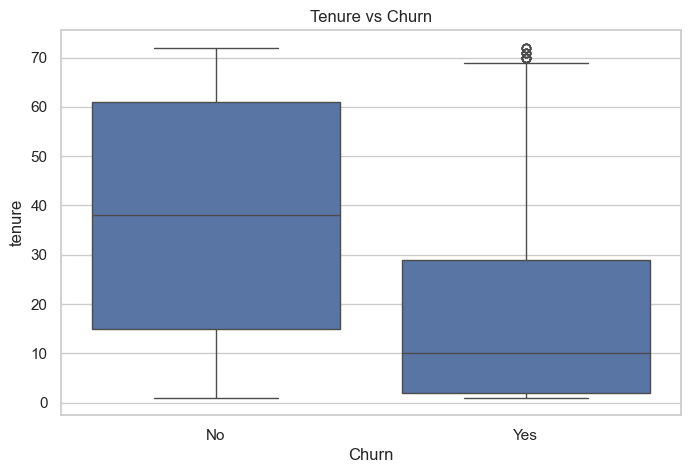

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'Churn', y = 'tenure', data = df)
plt.title('Tenure vs Churn')
plt.show()

#Explanation below the boxplot


### Tenure vs Churn – Key Insights

- **Tenure is measured in months**, representing how long a customer has been with the service.
- Customers with **short tenure (less than 12 months)** are **significantly more likely to churn**.
- Customers with **longer tenure (especially over 30 months)** demonstrate **higher retention and loyalty**.
- **Tenure is expected to be a highly predictive feature** in churn modeling.
- A few **outliers among churned customers** may influence model performance and should be reviewed during preprocessing.


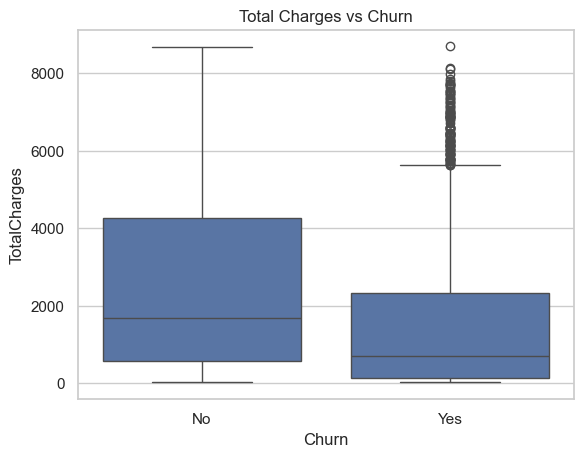

In [23]:
plt.Figure(figsize=(8,5))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()


# Explanation below the boxplot

### TotalCharges vs Churn – Key Insights

- **Retained customers** tend to have **significantly higher total charges**, indicating longer service duration or higher spending behavior.
- Most **churned customers** have **accumulated less than 3000** in total charges.
- There is a noticeable **cluster of outliers** among churned customers, which may impact model reliability if not handled properly.
  
➡️ These insights highlight the value of **TotalCharges** and **Tenure** as strong predictive features when modeling customer churn.


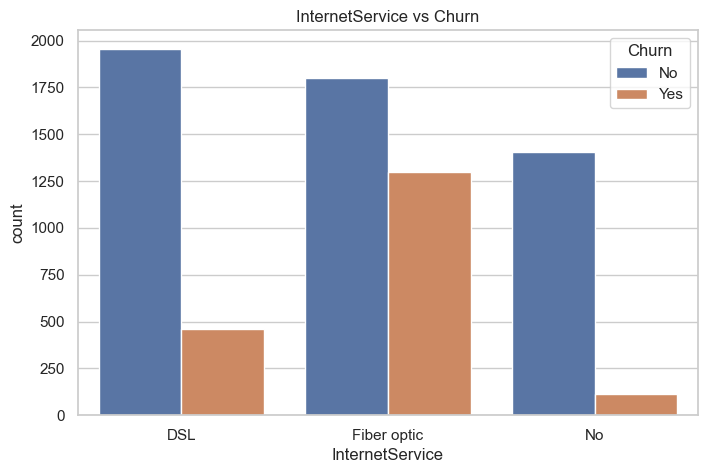

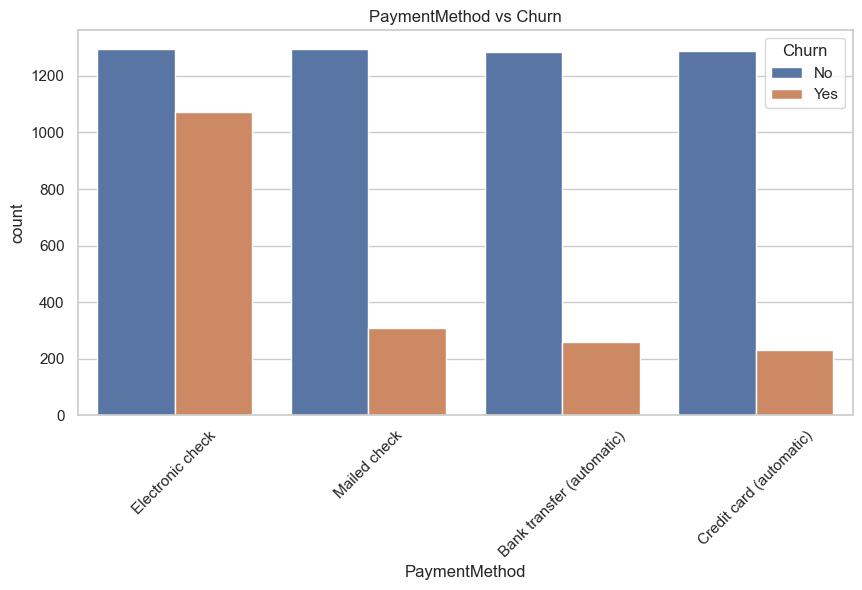

In [24]:
# InternetService vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('InternetService vs Churn')
plt.show()

# PaymentMethod vs Churn
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('PaymentMethod vs Churn')
plt.xticks(rotation=45)
plt.show()

# Explanation below the Visual

### InternetService vs Churn – Key Observations

We observe that customers using **Fiber Optic** service are leaving at a significantly higher rate compared to those using **DSL** or **No Internet Service**.

This suggests that:

1. The **Fiber Optic** service might be **too expensive**, or  
2. It **fails to meet customer expectations** in terms of performance or reliability.

Despite **DSL** having a larger customer base, its churn rate remains relatively lower, indicating better satisfaction or value.

➡️ This makes **InternetService** a potentially **strong predictor** for churn in our future machine learning model.


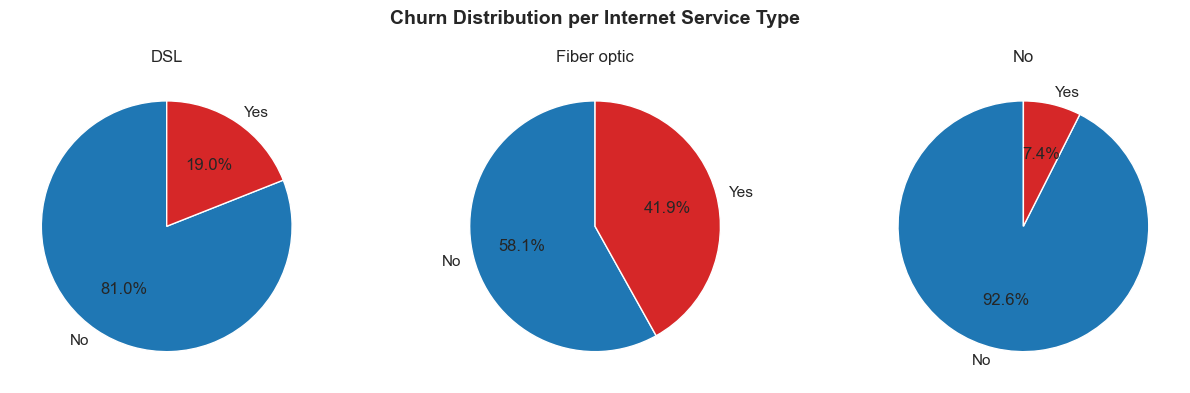

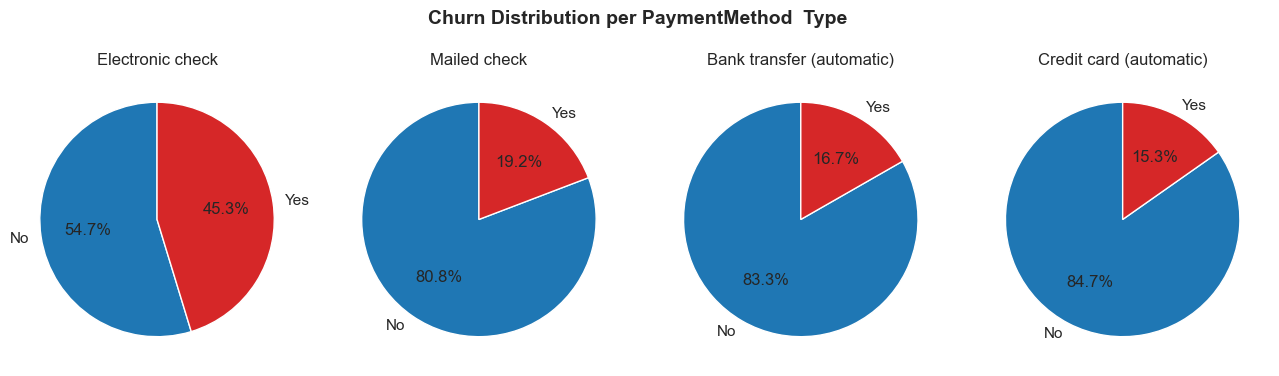

In [ ]:
internet_types = df['InternetService'].unique()

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

for i, service in enumerate(internet_types):
    counts = df[df['InternetService'] == service]['Churn'].value_counts(normalize=True)
    axes[i].pie(counts, labels=counts.index, autopct='%.1f%%', colors=['#1f77b4', '#d62728'], startangle=90)
    axes[i].set_title(service)

plt.suptitle('Churn Distribution per Internet Service Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# ------ #


PaymentMethod_types = df['PaymentMethod'].unique()

fig, axes = plt.subplots(1, 4, figsize=(13, 4))

for i, service in enumerate(PaymentMethod_types):
    counts = df[df['PaymentMethod'] == service]['Churn'].value_counts(normalize=True)
    axes[i].pie(counts, labels=counts.index, autopct='%.1f%%', colors=['#1f77b4', '#d62728'], startangle=90)
    axes[i].set_title(service)

plt.suptitle('Churn Distribution per PaymentMethod  Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Explanation below the Visual

### InternetService vs Churn & PaymentMethod vs Churn (as Percentage)

Based on the churn distribution by category:

#### Internet Service:
- **Fiber Optic users** have the highest churn rate at **~42%**, indicating potential dissatisfaction with the service quality or pricing.
- **DSL users** show a lower churn rate of **~19%**, suggesting higher satisfaction or better alignment with customer expectations.
- Customers with **no internet service** have the lowest churn rate at **~7%**, likely due to fewer service expectations or basic plans.

#### Payment Method:
- Customers using **Electronic Check** have the **highest churn rate (~45%)**, which may indicate that this payment method is inconvenient or less trusted.
- Those using **automatic methods** (Bank Transfer or Credit Card) exhibit **much lower churn rates (~15–17%)**, suggesting that **payment convenience contributes positively to retention**.


In [ ]:
from scipy.stats import chi2_contingency

#InternetService and Churn
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

# Implement Chi2 Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Value:", chi2)
print("P-value:", p)

# ------- # 


# PaymentMethod and Churn
contingency_table1 = pd.crosstab(df['PaymentMethod'], df['Churn'])

# implement Chi2 Test
chi2, p, dof, expected = chi2_contingency(contingency_table1)

print("Chi2 Value:", chi2)
print("P-value:", p)



# Simple Test to be sure that's Right or not

small_df = df.sample(100)
contingency = pd.crosstab(small_df['InternetService'], small_df['Churn'])
chi2, p, _, _ = chi2_contingency(contingency)
print(p)



Chi2 Value: 728.6956143058694
P-value: 5.831198962237274e-159
Chi2 Value: 645.4299001234638
P-value: 1.4263098511063342e-139
0.1270150277901707


#### Chi-Square Test Explanation

The **Chi-Square Test** helps us determine whether the observed relationship between two categorical variables (e.g., *Internet Service Type* and *Churn*) is statistically significant or just a coincidence.

- If **P-value ≥ 0.05**:  
  → The relationship is **not statistically significant** and may have occurred by chance.

- If **P-value < 0.05**:  
  → The relationship is **statistically significant**, suggesting a real association between the variables.


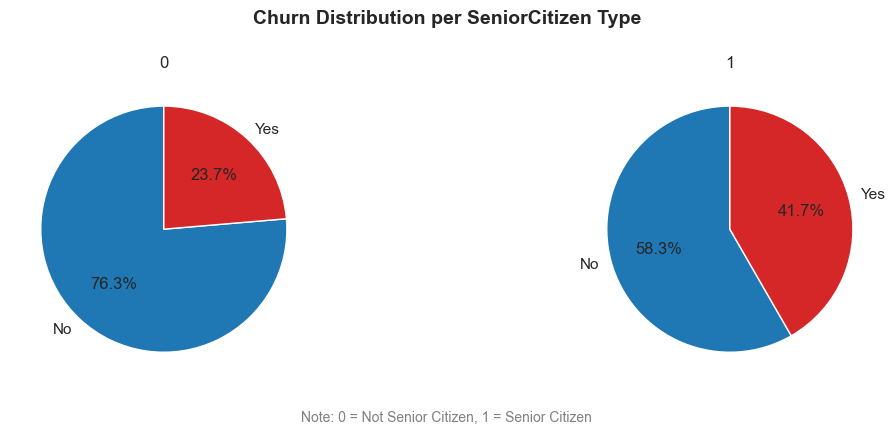

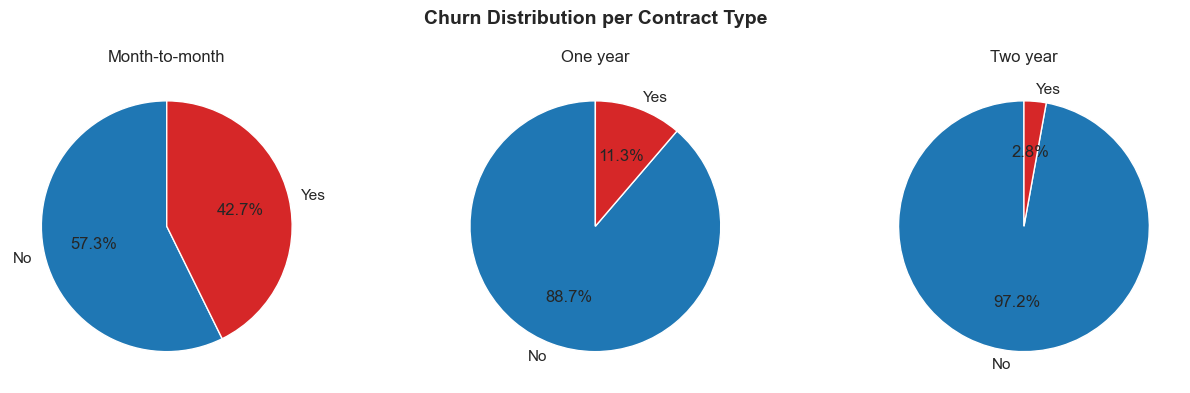

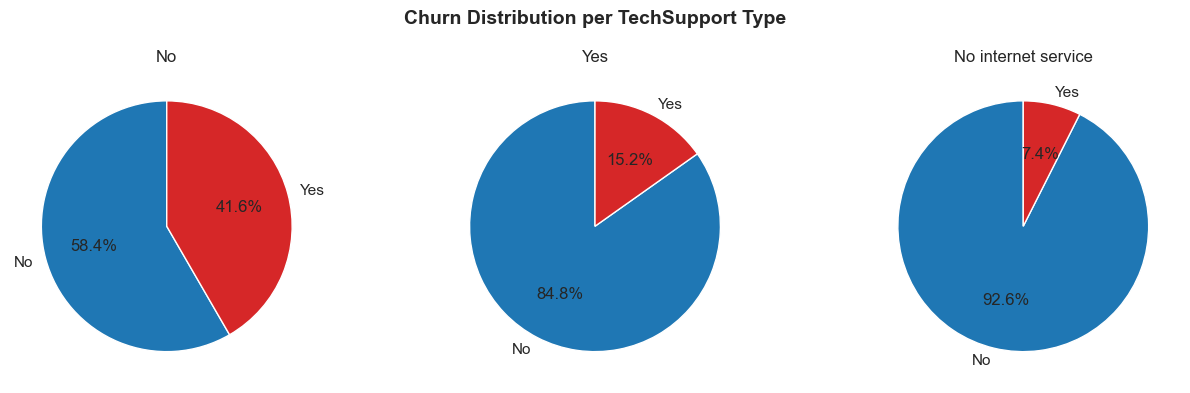

In [62]:
# For SeniorCitizen

internet_types2 = df['SeniorCitizen'].unique()

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

for i, service in enumerate(internet_types2):
    counts = df[df['SeniorCitizen'] == service]['Churn'].value_counts(normalize=True)
    axes[i].pie(counts, labels=counts.index, autopct='%.1f%%', colors=['#1f77b4', '#d62728'], startangle=90)
    axes[i].set_title(service)

plt.suptitle('Churn Distribution per SeniorCitizen Type', fontsize=14, fontweight='bold')
plt.tight_layout()
fig.text(0.5, -0.05, 'Note: 0 = Not Senior Citizen, 1 = Senior Citizen', ha='center', fontsize=10, color='gray')
plt.show()


# ----- #

# For Contract

internet_types3 = df['Contract'].unique()

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

for i, service in enumerate(internet_types3):
    counts = df[df['Contract'] == service]['Churn'].value_counts(normalize=True)
    axes[i].pie(counts, labels=counts.index, autopct='%.1f%%', colors=['#1f77b4', '#d62728'], startangle=90)
    axes[i].set_title(service)

plt.suptitle('Churn Distribution per Contract Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# ---- #


# For TechSupport

internet_types4 = df['TechSupport'].unique()

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

for i, service in enumerate(internet_types4):
    counts = df[df['TechSupport'] == service]['Churn'].value_counts(normalize=True)
    axes[i].pie(counts, labels=counts.index, autopct='%.1f%%', colors=['#1f77b4', '#d62728'], startangle=90)
    axes[i].set_title(service)

plt.suptitle('Churn Distribution per TechSupport Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()




### 1. **Age Group (SeniorCitizen)**
- **Senior customers** (coded as 1) have a significantly higher churn rate (**41.7%**) compared to non-senior customers (**23.7%**).
- This may indicate challenges among older users in adapting to or managing the service, possibly due to lower digital literacy or unmet service expectations.

---

### 2. **Contract Type**
- Customers with **Month-to-Month** contracts show the highest churn rate at **42.7%**, suggesting a lack of long-term commitment or satisfaction.
- In contrast, customers with **One-Year contracts** have a churn rate of only **11.3%**, and those with **Two-Year contracts** drop even further to **2.7%**.
- This strongly implies that **long-term contracts help retain customers**, potentially due to loyalty, discounts, or overall satisfaction with the service.

---

### 3. **Technical Support (TechSupport)**
- Customers who **did not receive technical support** have a churn rate of **41.6%**.
- Meanwhile, those who received tech support had a significantly lower churn rate (**15.2%**).
- This suggests that **providing accessible and effective tech support can play a crucial role in reducing churn**.

---

### ✅ **Conclusion**
The analysis highlights three major churn drivers:
- Lack of support for **senior users**.
- The **flexibility of short-term contracts**, which often leads to higher churn.
- The **absence of technical support**, which increases customer frustration and service discontinuation.

> These insights can guide strategic improvements such as developing senior-friendly services, incentivizing long-term subscriptions, and investing in strong technical support systems.


# 📊 EDA Final Summary – Telco Customer Churn

## 🔍 Key Findings:

- **Tenure**, **TotalCharges**, and **MonthlyCharges** are strong numerical predictors of churn.
- **InternetService**, **Contract**, **TechSupport**, and **PaymentMethod** show clear relationships with customer churn behavior.
- **SeniorCitizen** and **Gender** show weak or less actionable patterns.

## ⚠️ Outliers:

- Detected outliers in `TotalCharges` and `MonthlyCharges` that may affect model performance.
- These will be addressed in the preprocessing phase.

## ✅ Selected Features for Modeling:

We will focus on the following features based on their relevance to churn prediction:

```python
['tenure', 'MonthlyCharges', 'TotalCharges',
 'InternetService', 'Contract', 'PaymentMethod', 'TechSupport']


## 🧭 Next Step – Data Preprocessing

Now that we’ve completed the Exploratory Data Analysis (EDA), the next step is to prepare the data for machine learning. This phase is essential to ensure the model performs well and avoids misleading results.

### 🔧 Preprocessing Tasks:

1. **Encode Categorical Variables**  
   - Apply Label Encoding or One-Hot Encoding for columns like `InternetService`, `Contract`, `PaymentMethod`, etc.

2. **Scale Numerical Features**  
   - Consider scaling `MonthlyCharges`, `TotalCharges`, and `tenure` using techniques like StandardScaler or MinMaxScaler if needed.

3. **Handle Outliers**  
   - Review and address outliers found in `TotalCharges` and `MonthlyCharges` to prevent skewing the model.

4. **Split the Dataset**  
   - Divide the dataset into training and test sets (e.g., 80% train / 20% test) to evaluate model performance.

5. **Address Class Imbalance**  
   - If the `Churn` column is imbalanced, consider techniques like SMOTE, undersampling, or class weights.

---
Less relevant or redundant columns (like customerID, gender, PhoneService, etc.) Will dropped
